### Harmonic oscillator

The Hamiltonian

$$H(p,q)=\frac12 p^2 + \frac12 q^2.$$

For $m=1$, also may use 
$$q\equiv x, \quad p\equiv v\equiv \dot{x}.$$

### RK4 scheme does not preserve the Hamiltonian.

In [1]:
function V(x)
    return 0.5*x.^2
end

function force(x)
    return -x
end

function rk4(N,T,x0,v0)
    dt = T/N
    x = zeros(N+1)
    v = zeros(N+1)
    t = collect(0:N)*dt
    x[1] = x0
    v[1] = v0
    for i = 1 : N
        k1 = [v[i],force(x[i])]
        k2 = [v[i]+0.5*dt*k1[2],force(x[i]+0.5*dt*k1[1])]
        k3 = [v[i]+0.5*dt*k2[2],force(x[i]+0.5*dt*k2[1])]
        k4 = [v[i]+dt*k3[2],force(x[i]+dt*k3[1])]
        x[i+1] = x[i] + dt/6.0*(k1[1]+2.0*k2[1]+2.0*k3[1]+k4[1])
        v[i+1] = v[i] + dt/6.0*(k1[2]+2.0*k2[2]+2.0*k3[2]+k4[2])
    end
    return x,v
end

rk4 (generic function with 1 method)

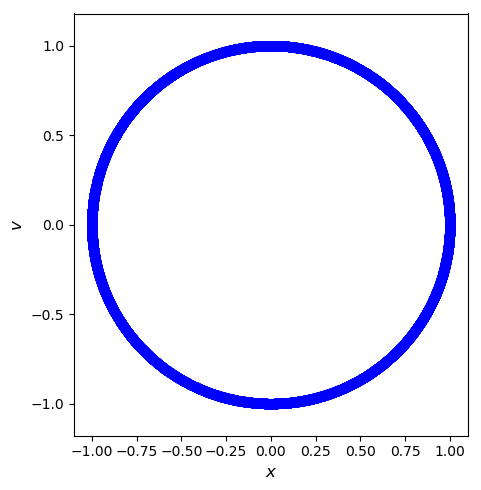

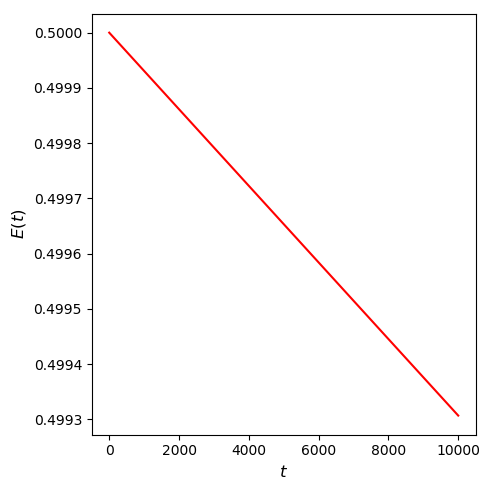

PyObject Text(28,0.5,'$E(t)$')

In [9]:
T = 10000.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
x0 = 0.0
v0 = 1.0

x,v = rk4(N,T,x0,v0)

using PyPlot
figure(1,figsize=(5,5))
st=10
plot(x[1:st:end],v[1:st:end],"bo")
xlabel(L"x")
ylabel(L"v")
axis("equal");

E = 0.5*v.^2 + V(x)

figure(2,figsize=(5,5))
plot(t[1:st:end],E[1:st:end],"r-")
xlabel(L"t")
ylabel(L"E(t)")


### The energy from the Verlet scheme oscillates around the true energy.

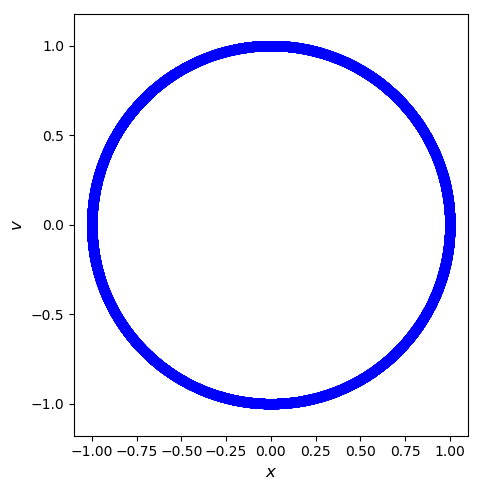

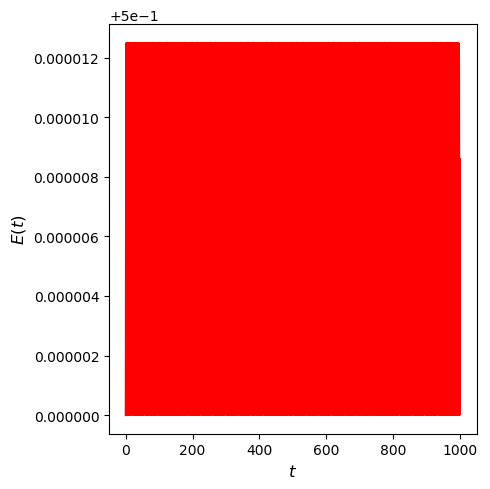

In [14]:
function verlet(N,T,x0,v0)
    dt = T/N
    x = zeros(N+1)
    v = zeros(N+1)
    f = zeros(N+1)
    t = collect(0:N)*dt
    x[1] = x0
    v[1] = v0
    f[1] = force(x[1])
    for i = 1 : N
        v[i+1] = v[i] + 0.5*dt*f[i]
        x[i+1] = x[i] + dt*v[i+1]
        f[i+1] = force(x[i+1])
        v[i+1] = v[i+1] + 0.5*dt*f[i+1]
    end
    return x,v
end

T = 1000.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
x0 = 0.0
v0 = 1.0

x,v = verlet(N,T,x0,v0)

using PyPlot
figure(1,figsize=(5,5))
st=10
plot(x[1:st:end],v[1:st:end],"bo")
xlabel(L"x")
ylabel(L"v")
axis("equal");

E = 0.5*v.^2 + V(x)

figure(2,figsize=(5,5))
plot(t[1:st:end],E[1:st:end],"r-")
xlabel(L"t")
ylabel(L"E(t)")



### Gauss-Legendre method of order 2. Symplectic RK method exactly preserves linear Hamiltonian system.

The implementation is special for force = -x. 

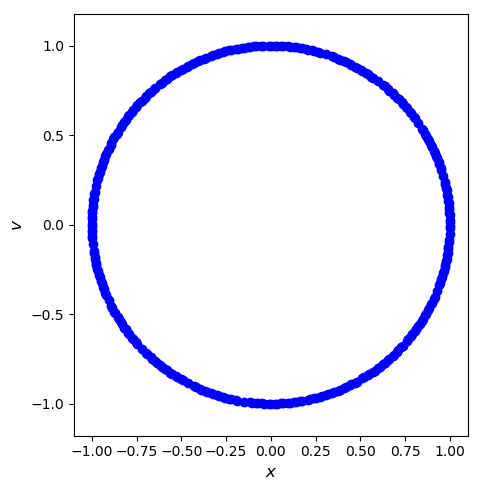

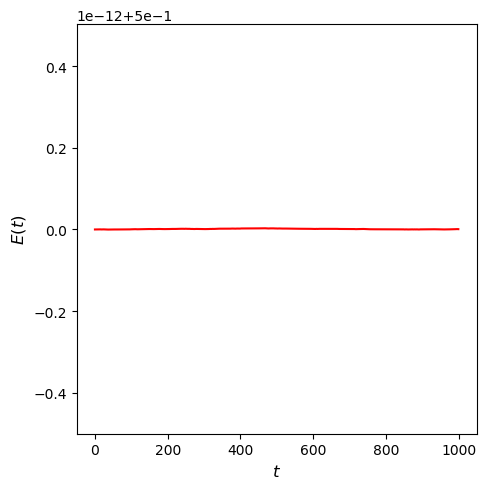

In [4]:

function gl1(N,T,x0,v0)
    dt = T/N
    x = zeros(N+1)
    v = zeros(N+1)
    t = collect(0:N)*dt
    x[1] = x0
    v[1] = v0
    A = [1.0   -0.5*dt
        0.5*dt  1.0]
    for i = 1 : N
        k = A\[v[i],-x[i]]
        x[i+1] = x[i] + dt*k[1]
        v[i+1] = v[i] + dt*k[2]
    end
    return x,v
end

T = 1000.0
dt = 0.3
N = round(Int64,T/dt)
t = collect(0:N)*dt
x0 = 0.0
v0 = 1.0

x,v = gl1(N,T,x0,v0)

using PyPlot
figure(1,figsize=(5,5))
st=10
plot(x[1:st:end],v[1:st:end],"bo")
xlabel(L"x")
ylabel(L"v")
axis("equal");

E = 0.5*v.^2 + V(x)

figure(2,figsize=(5,5))
plot(t[1:st:end],E[1:st:end],"r-")
xlabel(L"t")
ylabel(L"E(t)")



### Flow map preserves the volume in the phase space

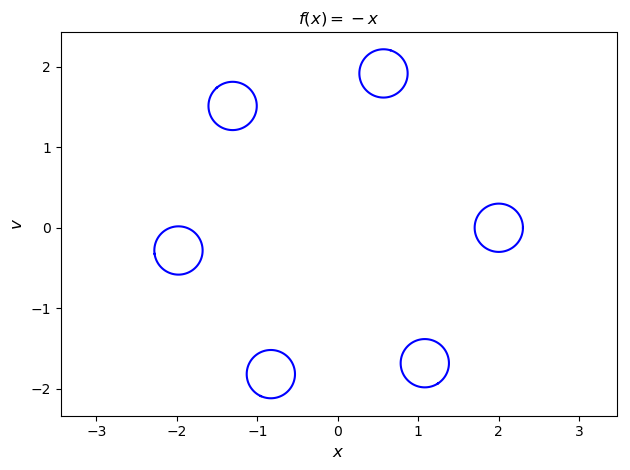

In [5]:
function force1(x)
    return -x
end

function force2(x)
    return -sin(x)
end

function verletfunc(N,T,x0,v0,forcefunc)
    dt = T/N
    x = zeros(N+1)
    v = zeros(N+1)
    f = zeros(N+1)
    t = collect(0:N)*dt
    x[1] = x0
    v[1] = v0
    f[1] = forcefunc(x[1])
    for i = 1 : N
        v[i+1] = v[i] + 0.5*dt*f[i]
        x[i+1] = x[i] + dt*v[i+1]
        f[i+1] = forcefunc(x[i+1])
        v[i+1] = v[i+1] + 0.5*dt*f[i+1]
    end
    return x,v
end

# Harmonic interaction

Ntheta = 100
theta = LinRange(0.0,2.0*pi,Ntheta)
Nl = 6
T = 1.0 * Nl
N = 100 * Nl
dt = T/N
t = collect(0:N)*dt

xtot = zeros(N+1,Ntheta)
vtot = zeros(N+1,Ntheta)

cnt = [2.0, 0.0]
rad = 0.3
for i = 1 : Ntheta
    x0 = cnt[1] + rad * cos(theta[i])
    v0 = cnt[2] + rad * sin(theta[i])
    xt,vt = verletfunc(N,T,x0,v0,force1)
    xtot[:,i] = xt
    vtot[:,i] = vt
end

using PyPlot
figure(1)
for l = 1 : Nl
    plot(vec(xtot[1+(l-1)*div(N,Nl),:]),vec(vtot[1+(l-1)*div(N,Nl),:]),"b-")
end
xlabel(L"x")
ylabel(L"v")
title(L"f(x)=-x")
axis("equal");


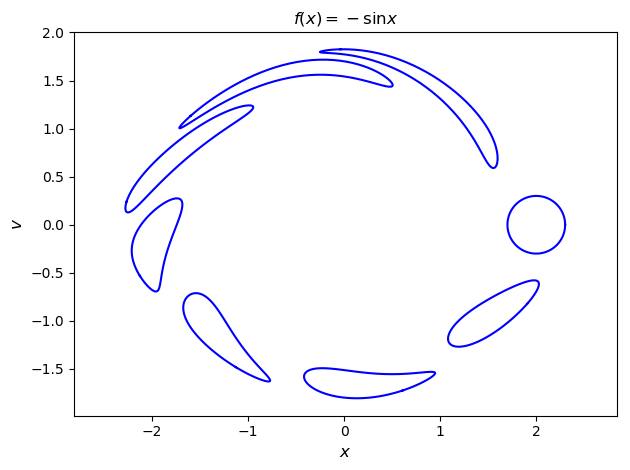

In [6]:
# Anharmonic interaction

Ntheta = 100
theta = LinRange(0.0,2.0*pi,Ntheta)
Nl = 8
T = 1.0 * Nl
N = 100 * Nl
dt = T/N
t = collect(0:N)*dt

xtot = zeros(N+1,Ntheta)
vtot = zeros(N+1,Ntheta)

cnt = [2.0, 0.0]
rad = 0.3
for i = 1 : Ntheta
    x0 = cnt[1] + rad * cos(theta[i])
    v0 = cnt[2] + rad * sin(theta[i])
    xt,vt = verletfunc(N,T,x0,v0,force2)
    xtot[:,i] = xt
    vtot[:,i] = vt
end

using PyPlot
figure(1)
for l = 1 : Nl
    plot(vec(xtot[1+(l-1)*div(N,Nl),:]),vec(vtot[1+(l-1)*div(N,Nl),:]),"b-")
end
xlabel(L"x")
ylabel(L"v")
title(L"f(x)=-\sin x")
axis("equal");
